In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install git
!git clone https://github.com/narumiruna/efficientnet-pytorch.git
!pip install efficientnet_pytorch
!pip install torchmetrics
!pip install -q tqdm
!pip install --upgrade --no-cache-dir gdown

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Cloning into 'efficientnet-pytorch'...
remote: Enumerating objects: 882, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 882 (delta 170), reused 207 (delta 121), pack-reused 572 (from 1)
Receiving objects: 100% (882/882), 295.90 KiB | 8.00 MiB/s, done.
Resolving deltas: 100% (481/481), done.
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=5595c1285387c78162eb340809ca3423cf649838786bd465e575f32210e4c054
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/9

In [ ]:
!pip install mlconfig

In [ ]:
import cv2
import os
import requests
import tarfile
from six.moves import cPickle
import imageio
import matplotlib.pyplot as plt
import random
from PIL import Image
import zipfile
import shutil
import imghdr
import shutil
import math
import sys
import urllib
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.optim as optim
from collections import OrderedDict
from torchvision.models import efficientnet_b0
import numpy as np
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torch.optim.lr_scheduler import ExponentialLR
from tqdm import tqdm

ModuleNotFoundError: No module named 'efficientnet_pytorch'

In [ ]:
model = efficientnet_b0(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 96.8MB/s]


In [ ]:
class Dataset:
    def __init__(self, path_to_imgs):
        if not os.path.exists(path_to_imgs):
            raise FileNotFoundError(f"The {path_to_img} directory do not exist")
        else:
            self.path_to_imgs = path_to_imgs

    def imgs_nums(self):
        img_num = len([name for name in os.listdir(self.path_to_imgs) if os.path.isfile(os.path.join(self.path_to_imgs, name))])
        return img_num

    def view_random_image(self):
        image_files = [f for f in os.listdir(self.path_to_imgs) if os.path.isfile(os.path.join(self.path_to_imgs, f))]
        random_image_file = random.choice(image_files)
        random_image_path = os.path.join(self.path_to_imgs, random_image_file)
        img = Image.open(random_image_path)
        img_size = img.size
        print(f"Name of image: {random_image_file}")
        print(f"Size of image: {img_size}")
        plt.imshow(img)
        plt.show()

    def showAllImgsWithType(self, type):
        for filename in os.listdir(self.path_to_imgs):
            abs_filename = os.path.join(self.path_to_imgs, filename)
            if os.path.isfile(abs_filename) and filename.lower().endswith(f".{type}"):
                print(abs_filename)

    def convertToJpg(self):
        input_folder = self.path_to_imgs
        for filename in os.listdir(input_folder):
            input_path = os.path.join(input_folder, filename)
            img_format = imghdr.what(input_path)
            if not img_format:
                print(f"Skipping {filename}: The file format is not supported")
                continue
            output_path = os.path.join(input_folder, os.path.splitext(filename)[0] + ".jpg")
            img = Image.open(input_path)
            img.save(output_path, "JPEG")
            os.remove(input_path)
            print(f"The conversion of {filename} is complet")

    def resizeAllImagesInDir(self):
        for filename in os.listdir(self.path_to_imgs):
            abs_filename = os.path.join(self.path_to_imgs, filename)
            if os.path.isfile(abs_filename):
                img = cv2.imread(abs_filename)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    cv2.imwrite(abs_filename, img)
                else:
                    os.remove(abs_filename)

In [ ]:
class Img:
    def __init__(self, path_to_imgs):
        if not os.path.exists(path_to_imgs):
            raise FileNotFoundError(f"Image on {path_to_imgs} donot exist")
        else:
            self.path_to_imgs = path_to_imgs

    def get_img_and_size(self):
        img = cv2.imread(self.path_to_imgs)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print(img.shape)
        plt.imshow(img)
        plt.show()

In [ ]:
path_to_dataset = "/content/drive/MyDrive/PlaneDatabase"

In [ ]:
Plane_1 = Dataset("/content/drive/MyDrive/PlaneDatabase/A400M")
print(Plane_1.imgs_nums())

464


In [ ]:
Plane_2 = Dataset("/content/drive/MyDrive/PlaneDatabase/C130")
print(Plane_2.imgs_nums())

1298


Name of image: c0d63c51ef9c7490a97d282846ec2c1d_0.jpg
Size of image: (276, 219)


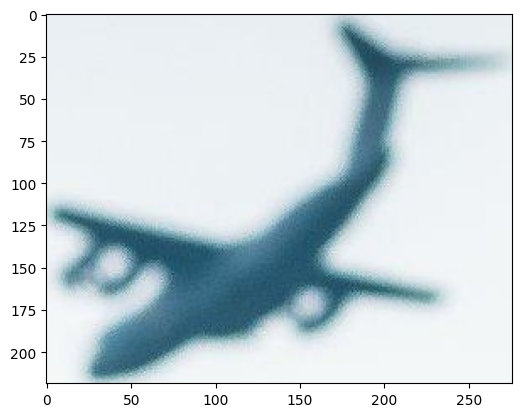

In [ ]:
Plane_1.view_random_image()

Name of image: c46ac288df30c1058d0cf223f969765d_6.jpg
Size of image: (275, 69)


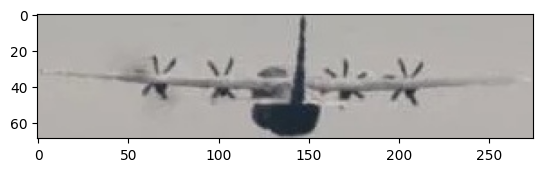

In [ ]:
Plane_2.view_random_image()

In [ ]:
def copy_files_by_percentage(source_folder, destination_folder, sizeofds, percentage):
    if not os.path.exists(source_folder):
        raise FileNotFoundError(f"The {source_folder} directory do not exist")

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    files = os.listdir(source_folder)
    jpg_files = [file for file in files if file.lower().endswith(".jpg")]
    jpg_files.sort()

    total_jpg_files = len(jpg_files)
    print(f"Number of files {total_jpg_files}")

    if total_jpg_files != sizeofds:
        print(f'{total_jpg_files} and {sizeofds}')
        raise ValueError("wrong")

    files_to_move_count = math.ceil(total_jpg_files * percentage / 100)
    jpg_files_to_copy = jpg_files[:files_to_move_count]

    for file_name in jpg_files_to_copy:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.copy2(source_path, destination_path)

    print(f"Copied {len(jpg_files_to_copy)} JPG files from {source_folder} to {destination_folder}")

In [ ]:
copy_files_by_percentage("/content/drive/MyDrive/PlaneDatabase/A400M", "/content/drive/MyDrive/Dataset_remark/A400M", Plane_1_dataset.imgs_nums(), 100)

Number of files 464
Copied 464 JPG files from /content/drive/MyDrive/PlaneDatabase/A400M to /content/drive/MyDrive/Dataset_remark/A400M


In [ ]:
copy_files_by_percentage("/content/drive/MyDrive/PlaneDatabase/C130", "/content/drive/MyDrive/Dataset_remark/C130", Plane_2_dataset.imgs_nums(), 100)

Number of files 1298
Copied 1298 JPG files from /content/drive/MyDrive/PlaneDatabase/C130 to /content/drive/MyDrive/Dataset_remark/C130


In [ ]:
Dataset("/content/drive/MyDrive/Dataset_remark/C130").resizeAllImagesInDir()
Dataset("/content/drive/MyDrive/Dataset_remark/A400M").resizeAllImagesInDir()

In [ ]:
Dataset("/content/drive/MyDrive/Dataset_remark/A400M").imgs_nums()

464

In [ ]:
Dataset("/content/drive/MyDrive/Dataset_remark/C130").imgs_nums()

1298

In [ ]:
source_dir = "/content/drive/MyDrive/Dataset_remark"
train_dir = os.path.join(source_dir, "train")
valid_dir = os.path.join(source_dir, "valid")

In [ ]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

In [ ]:
import shutil
from sklearn.model_selection import train_test_split


def split_data(source_dir, train_dir, valid_dir, test_size=0.1):
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        images = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

        if len(images) == 0:
            print(f"Class empty {class_name} cont")
            continue

        if len(images) < 10:
            print(f"Class {class_name} no enought frames")
            continue

        train_images, valid_images = train_test_split(images, test_size=test_size, random_state=42)

        train_class_dir = os.path.join(train_dir, class_name)
        valid_class_dir = os.path.join(valid_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(valid_class_dir, exist_ok=True)

        for img in train_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(train_class_dir, img)
            shutil.copy(src, dst)

        for img in valid_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(valid_class_dir, img)
            shutil.copy(src, dst)

        print(f"Class {class_name}: {len(train_images)} for train, {len(valid_images)} for valid")

In [ ]:
train_dir = "/content/drive/MyDrive/Dataset_remark/train"
valid_dir = "/content/drive/MyDrive/Dataset_remark/valid"

In [ ]:
batch_size = 32
image_size = 224
num_epochs = 25
num_classes = 2
learning_rate = 0.0125

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}


In [ ]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=data_transforms['train'])
valid_dataset = datasets.ImageFolder(root=valid_dir, transform=data_transforms['valid'])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
print(f"Train classes: {train_dataset.classes}")
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of validation images: {len(valid_dataset)}")

Train classes: ['A400M', 'C130']
Number of training images: 1585
Number of validation images: 177


In [ ]:
model = efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, momentum=0.9, eps=1e-3)
scheduler = ExponentialLR(optimizer, gamma=0.98738885893)

In [ ]:
def train_one_epoch(epoch, model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}")
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    return running_loss / len(train_loader)

In [ ]:
def validate(model, valid_loader, criterion, device):
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(valid_loader, desc="Validation"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    accuracy = correct / total
    return valid_loss / len(valid_loader), accuracy

In [ ]:
for epoch in range(num_epochs):
    train_loss = train_one_epoch(epoch, model, train_loader, optimizer, criterion, device)
    valid_loss, valid_accuracy = validate(model, valid_loader, criterion, device)
    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}")

Validation: 100%|██████████| 6/6 [00:15<00:00,  2.57s/it]


Epoch 1/25
  Train Loss: 10.4412
  Valid Loss: 5.7106, Valid Accuracy: 0.2768


Validation: 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]


Epoch 2/25
  Train Loss: 3.1542
  Valid Loss: 2.4185, Valid Accuracy: 0.7458


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]


Epoch 3/25
  Train Loss: 1.4487
  Valid Loss: 0.5987, Valid Accuracy: 0.6610


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.68it/s]


Epoch 4/25
  Train Loss: 1.0590
  Valid Loss: 0.5883, Valid Accuracy: 0.6441


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.48it/s]


Epoch 5/25
  Train Loss: 0.8083
  Valid Loss: 0.5506, Valid Accuracy: 0.7514


Validation: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]


Epoch 6/25
  Train Loss: 0.7348
  Valid Loss: 0.5151, Valid Accuracy: 0.7458


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.37it/s]


Epoch 7/25
  Train Loss: 0.8718
  Valid Loss: 0.6340, Valid Accuracy: 0.7458


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]


Epoch 8/25
  Train Loss: 0.7433
  Valid Loss: 0.5825, Valid Accuracy: 0.6780


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.53it/s]


Epoch 9/25
  Train Loss: 0.5980
  Valid Loss: 0.5185, Valid Accuracy: 0.7458


Validation: 100%|██████████| 6/6 [00:01<00:00,  4.29it/s]


Epoch 10/25
  Train Loss: 0.6602
  Valid Loss: 0.5105, Valid Accuracy: 0.7458


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.40it/s]


Epoch 11/25
  Train Loss: 0.6104
  Valid Loss: 0.5436, Valid Accuracy: 0.7345


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.41it/s]


Epoch 12/25
  Train Loss: 0.5869
  Valid Loss: 0.5609, Valid Accuracy: 0.7514


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]


Epoch 13/25
  Train Loss: 0.6148
  Valid Loss: 0.6976, Valid Accuracy: 0.7514


Validation: 100%|██████████| 6/6 [00:01<00:00,  4.26it/s]


Epoch 14/25
  Train Loss: 0.6296
  Valid Loss: 0.8294, Valid Accuracy: 0.5254


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]


Epoch 15/25
  Train Loss: 0.6278
  Valid Loss: 0.7080, Valid Accuracy: 0.5311


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]


Epoch 16/25
  Train Loss: 0.6679
  Valid Loss: 0.9186, Valid Accuracy: 0.5593


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.47it/s]


Epoch 17/25
  Train Loss: 0.5980
  Valid Loss: 0.5280, Valid Accuracy: 0.7401


Validation: 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]


Epoch 18/25
  Train Loss: 0.5764
  Valid Loss: 0.5051, Valid Accuracy: 0.7571


Validation: 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]


Epoch 19/25
  Train Loss: 0.5773
  Valid Loss: 0.5511, Valid Accuracy: 0.7401


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]


Epoch 20/25
  Train Loss: 0.5698
  Valid Loss: 0.5237, Valid Accuracy: 0.7401


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.56it/s]


Epoch 21/25
  Train Loss: 0.5576
  Valid Loss: 0.5177, Valid Accuracy: 0.7514


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.24it/s]


Epoch 22/25
  Train Loss: 0.5333
  Valid Loss: 0.5337, Valid Accuracy: 0.7458


Validation: 100%|██████████| 6/6 [00:01<00:00,  4.24it/s]


Epoch 23/25
  Train Loss: 0.5521
  Valid Loss: 0.4902, Valid Accuracy: 0.7232


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.47it/s]


Epoch 24/25
  Train Loss: 0.5254
  Valid Loss: 58.8157, Valid Accuracy: 0.7345


Validation: 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]

Epoch 25/25
  Train Loss: 0.5494
  Valid Loss: 0.5734, Valid Accuracy: 0.7571


In [ ]:
output_path = "/content/drive/MyDrive/Dataset_remark/plane_model.pth"
torch.save(model.state_dict(), output_path)
print(f"Модель сохранена по пути: {output_path}")

Модель сохранена по пути: /content/drive/MyDrive/Dataset_remark/plane_model.pth


In [ ]:
def load_and_predict_on_img(image_path, checkpoint_path):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = efficientnet_b0(weights=None)
    model.classifier = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(model.classifier[1].in_features, 2),
        nn.Softmax(dim=1)
    )
    model = model.to(device)

    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint)

    tfms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    try:
        img = tfms(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)
    except Exception as e:
        print(f"ошибка изображения: {e}")
        return

    model.eval()
    with torch.no_grad():
        res = model(img)

    class_names = ['C130', 'A400M']
    predicted_class = torch.argmax(res, dim=1).item()
    predicted_probability = torch.max(res).item()

    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Probability: {predicted_probability * 100:.2f}%")

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Dataset_remark/plane_model.pth"

In [ ]:
image_path = "/content/drive/MyDrive/PlaneDatabase/Mig29/0e7a6adc853f876b9cd9b20eb3b01142_0.jpg" #"/content/drive/MyDrive/PlaneDatabase/A400M/c0d63c51ef9c7490a97d282846ec2c1d_0.jpg"

In [ ]:
load_and_predict_on_img(image_path, checkpoint_path)

<ipython-input-9-28c3c30622e1>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


Predicted class: A400M
Probability: 93.01%


In [ ]:
def load_and_predict(image, model, class_names=None, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if class_names is None:
        class_names = ['C130', 'A400M']

    tfms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = tfms(image).unsqueeze(0).to(device)

    model = model.to(device)
    model.eval()
    with torch.no_grad():
        res = model(img)
        probabilities = torch.nn.functional.softmax(res, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        predicted_probability = probabilities[0, predicted_class].item()

    return class_names[predicted_class], predicted_probability

In [ ]:
import tempfile

def makeRecognition(input_video, output_video):
    video_path = os.path.abspath(input_video)
    output_path = os.path.abspath(output_video)

    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print("err open video:", video_path)
        return

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = efficientnet_b0(weights=None)
    model.classifier = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(model.classifier[1].in_features, 2)
    )
    model.load_state_dict(torch.load("/content/drive/MyDrive/Dataset_remark/plane_model.pth", map_location=device))
    model.to(device)

    w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (w, h))

    _, prev_frame = video.read()
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    class_names = ['C130', 'A400M']

    while True:
        ok, frame = video.read()
        if not ok:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        diff = cv2.absdiff(prev_gray, gray_frame)
        _, binary_diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            x, y, w_rect, h_rect = cv2.boundingRect(contour)
            area = w_rect * h_rect

            if area < 1000:
                continue

            cropped_img = frame[y:y+h_rect, x:x+w_rect]

            predicted_class, predicted_probability = load_and_predict(
                image=cropped_img,
                model=model,
                class_names=class_names,
                device=device
            )

            if predicted_probability < 0.9:
                continue

            color = (0, 255, 0) if predicted_class == 'C130' else (0, 0, 255)
            cv2.rectangle(frame, (x, y), (x + w_rect, y + h_rect), color, 2)
            text = f"{predicted_class}: {predicted_probability * 100:.2f}%"
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

        out.write(frame)
        prev_gray = gray_frame

    video.release()
    out.release()
    print("Processing complete. Video saved to:", output_path)

In [ ]:
makeRecognition("/content/drive/MyDrive/video_plane_2.mp4", "/content/drive/MyDrive/video_planes_result.mp4")

<ipython-input-35-4f6e6e17d57d>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/Dataset_remark/plane_model.pth", m

Processing complete. Video saved to: /content/drive/MyDrive/video_planes_result.mp4


In [ ]:
#тут начало всего, что сдавалось

In [ ]:
#----------------------тут была проба пера и вышло херово, решено было обучить на 5 классах и поиграть с видео----------------------------------------------------

In [ ]:
#обучение

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
import sys
import torchvision.transforms as T
import numpy as np
from torchvision import models
from scipy.optimize import linear_sum_assignment

In [ ]:
data_dir = "/content/drive/MyDrive/PlaneDatabase"

filepaths = []
labels = []

folds = os.listdir(data_dir)

for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)

In [ ]:
data_dir = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

In [ ]:
selected_classes = ["A10", "A400M", "EF2000", "F16", "Mig29"]
data_dir = data_dir[data_dir['labels'].isin(selected_classes)]

In [ ]:
train_df, test_df = train_test_split(data_dir, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
class PlaneDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['filepaths']
        label = self.dataframe.iloc[idx]['labels']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label_idx = selected_classes.index(label)
        return image, label_idx

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = PlaneDataset(train_df, transform=transform)
test_dataset = PlaneDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model = models.efficientnet_b3(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, len(selected_classes))
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, dataloader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

train_model(model, train_loader, criterion, optimizer, epochs=20)

model_path = "/content/drive/MyDrive/PlaneModel_5Classes.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 78.5MB/s]


Epoch 1/20, Loss: 0.7200
Epoch 2/20, Loss: 0.3705
Epoch 3/20, Loss: 0.2673
Epoch 4/20, Loss: 0.2041
Epoch 5/20, Loss: 0.1423
Epoch 6/20, Loss: 0.1882
Epoch 7/20, Loss: 0.1202
Epoch 8/20, Loss: 0.0983
Epoch 9/20, Loss: 0.1182
Epoch 10/20, Loss: 0.1367
Epoch 11/20, Loss: 0.0689
Epoch 12/20, Loss: 0.0772
Epoch 13/20, Loss: 0.0514
Epoch 14/20, Loss: 0.0905
Epoch 15/20, Loss: 0.1018
Epoch 16/20, Loss: 0.0391
Epoch 17/20, Loss: 0.1356
Epoch 18/20, Loss: 0.0820
Epoch 19/20, Loss: 0.0685
Epoch 20/20, Loss: 0.0583
Model saved to /content/drive/MyDrive/PlaneModel_5Classes.pth


In [ ]:
#проверка

In [ ]:
model = models.efficientnet_b3(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, len(selected_classes))
)

In [ ]:
model_path = "/content/drive/MyDrive/PlaneModel_5Classes.pth"
model.load_state_dict(torch.load(model_path))

<ipython-input-14-e6d8e1b9eaac>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [ ]:
model = model.to(device)

In [ ]:
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
def verify_model_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
verify_model_accuracy(model, test_loader)

Accuracy: 87.13%


In [ ]:
#на этом работа с датасетом окончена и начинается работа с видео

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b3(pretrained=False)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 5)
)
model.load_state_dict(torch.load("/content/drive/MyDrive/PlaneModel_5Classes.pth", map_location=device))
model = model.to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-4-418576d557d2>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as T
from torchvision import models
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_path = "/content/drive/MyDrive/PlaneModel_5Classes.pth"
model = models.efficientnet_b3(pretrained=False)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 5)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

<ipython-input-7-012b5596aef0>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
class_names = ["A10", "A400M", "EF2000", "F16", "Mig29"]

In [ ]:
transform = T.Compose([
    T.ToTensor(),
    T.Resize((224, 224)),
    T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
input_video_path = "/content/drive/MyDrive/mig29_video.mp4"
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"не удалось открыть: {input_video_path}")

In [ ]:
ret, frame = cap.read()
cap.release()

In [ ]:
if not ret:
    raise ValueError("не удалось считать первый кадр")

In [ ]:
roi = frame

In [ ]:
input_tensor = transform(roi).unsqueeze(0).to(device)

In [ ]:
with torch.no_grad():
    outputs = model(input_tensor)
    probs = torch.softmax(outputs, dim=1)[0]

In [ ]:
pred_idx = probs.argmax().item()
pred_class = class_names[pred_idx]
pred_prob = probs[pred_idx].item()

In [ ]:
print(f"Предсказанный класс: {pred_class}, вероятность: {pred_prob:.4f}")
print("Распределение по классам:")
for i, cls in enumerate(class_names):
    print(f"{cls}: {probs[i].item():.4f}")

Предсказанный класс: F16, вероятность: 0.5566
Распределение по классам:
A10: 0.0031
A400M: 0.0255
EF2000: 0.4069
F16: 0.5566
Mig29: 0.0079


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "/content/drive/MyDrive/PlaneModel_5Classes.pth"
model = models.efficientnet_b3(pretrained=False)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 5)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

class_names = ["A10", "A400M", "EF2000", "F16", "Mig29"]

transform = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-12-67a9759a096a>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

In [ ]:
#тут распознование, но простое, хотя для всего это нормально

In [ ]:
def load_and_predict(image_path, model):
    img = transform(Image.open(image_path)).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        res = model(img)
    probs = torch.softmax(res, dim=1)[0]
    predicted_class_idx = torch.argmax(probs).item()
    predicted_class = class_names[predicted_class_idx]
    predicted_probability = probs[predicted_class_idx].item()
    return predicted_class, predicted_probability

In [ ]:
def makeRecognition(input_video, output_video):
    base_path = "/content/drive/MyDrive/"

    video_path = os.path.join(base_path, input_video)
    output_path = os.path.join(base_path, output_video)

    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print('Err open video:', video_path)
        sys.exit()

    w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out_vid = cv2.VideoWriter(output_path, fourcc, 20.0, (w, h))

    ok, firstframe = video.read()
    if not ok:
        print('Err read first frame')
        sys.exit()

    gray_frame = cv2.cvtColor(firstframe, cv2.COLOR_BGR2GRAY)
    prev_frame = gray_frame

    while True:
        ok, frame = video.read()
        if not ok:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        diff = cv2.absdiff(gray_frame, prev_frame)
        _, binary_diff = cv2.threshold(diff, 24, 255, cv2.THRESH_BINARY)
        blurred_diff = cv2.blur(binary_diff, (25, 25))

        contours, _ = cv2.findContours(blurred_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        tmp_copy = frame.copy()
        common_mask = np.zeros_like(frame, dtype=np.uint8)

        for contour in contours:
            x_rect, y_rect, w_rect_cont, h_rect_cont = cv2.boundingRect(contour)

            is_nested = False
            for parent_contour in contours:
                if parent_contour is not contour:
                    x_parent, y_parent, w_parent, h_parent = cv2.boundingRect(parent_contour)
                    if (x_rect >= x_parent and y_rect >= y_parent and
                        x_rect + w_rect_cont <= x_parent + w_parent and
                        y_rect + h_rect_cont <= y_parent + h_parent):
                        is_nested = True
                        break

            min_rect_size = 70
            if not is_nested and w_rect_cont >= min_rect_size and h_rect_cont >= min_rect_size:
                tmp_image_path = "temp.jpg"
                cv2.imwrite(tmp_image_path, frame[y_rect:y_rect + h_rect_cont, x_rect:x_rect + w_rect_cont])

                predicted_class, predicted_probability = load_and_predict(tmp_image_path, model)

                if predicted_probability >= 0.8:
                    rect_color = (0, 252, 0)
                    cv2.rectangle(tmp_copy, (x_rect, y_rect), (x_rect + w_rect_cont, y_rect + h_rect_cont), rect_color, 2)

                    rect_mask = np.zeros_like(frame, dtype=np.uint8)
                    cv2.rectangle(rect_mask, (x_rect, y_rect), (x_rect + w_rect_cont, y_rect + h_rect_cont), (255, 255, 255), thickness=cv2.FILLED)
                    common_mask = cv2.bitwise_or(common_mask, rect_mask)

                    text = f"{predicted_class}: {predicted_probability*100:.2f}%"
                    font_size = 0.7
                    font_thickness = 1
                    font_color = (255, 255, 255)
                    text_position = (x_rect, y_rect - 10)
                    cv2.putText(tmp_copy, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

        blurred_common_mask = cv2.GaussianBlur(common_mask, (51, 51), 0)
        tmp_copy = cv2.addWeighted(tmp_copy, 0.6, blurred_common_mask, 0.3, 0)

        out_vid.write(tmp_copy)
        prev_frame = gray_frame

    video.release()
    out_vid.release()
    print("Processing is completed. The video is saved in", output_path)

makeRecognition("a10c.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


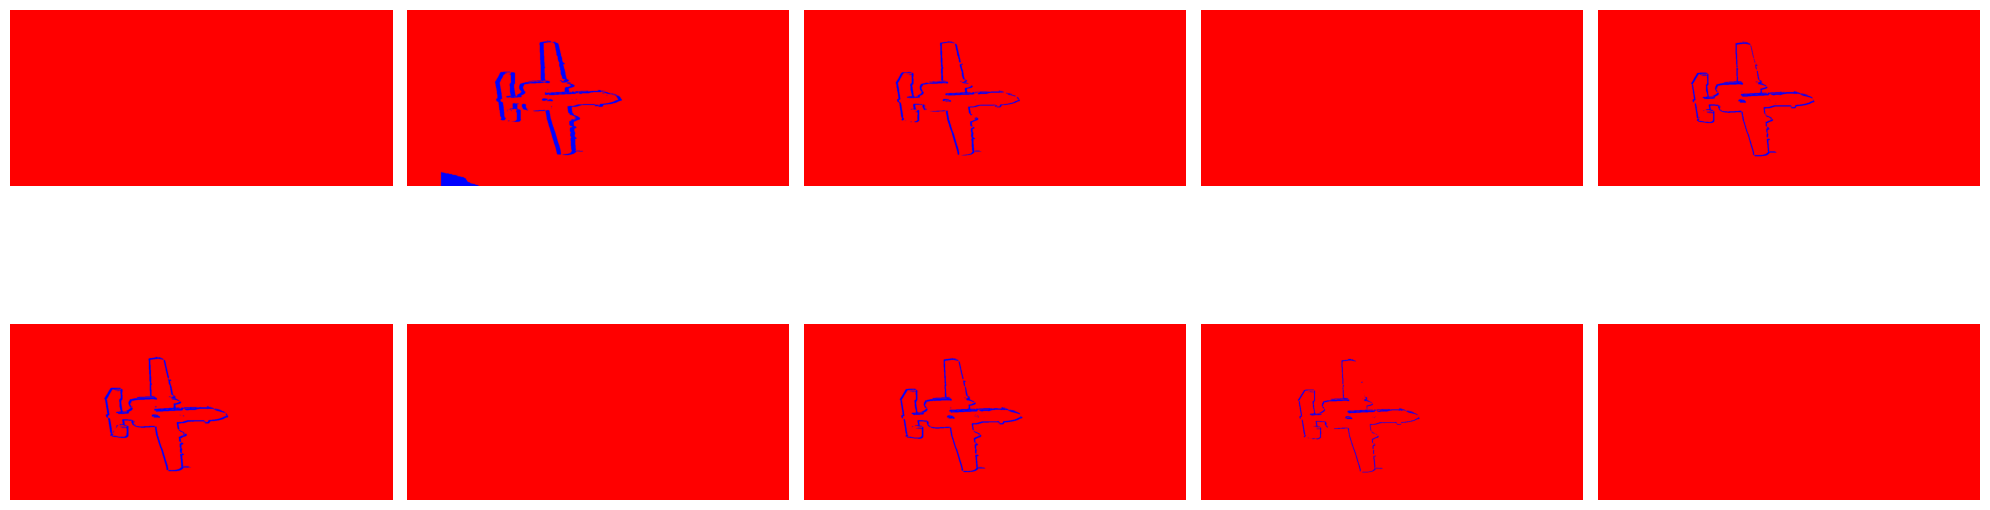

In [ ]:
import matplotlib.pyplot as plt
def show_color(video_name):
    base_path = "/content/drive/MyDrive/"
    video_path = os.path.join(base_path, video_name)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print('Err open video file:', video_path)
        return

    ret, first_frame = cap.read()
    if not ret:
        print("Err read first frame")
        cap.release()
        return

    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

    processed_frames = []
    max_frames = 10
    frame_count = 0

    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        diff = cv2.absdiff(gray_frame, prev_gray)
        _, binary_diff = cv2.threshold(diff, 24, 255, cv2.THRESH_BINARY)


        colored = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)
        colored[binary_diff == 0] = [255, 0, 0]
        colored[binary_diff == 255] = [0, 0, 255]
        processed_frames.append(colored)
        prev_gray = gray_frame

    cap.release()

    fig, axes = plt.subplots(2, 5, figsize=(20,8))
    axes = axes.flatten()

    for i in range(10):
        ax = axes[i]
        ax.axis('off')
        if i < len(processed_frames):
            ax.imshow(processed_frames[i])
        else:
            ax.text(0.5, 0.5, "No Frame", ha='center', va='center', fontsize=12)

    plt.tight_layout()
    plt.show()

show_color("a10c.mp4")

In [ ]:
#вырезаем все что детектим, в папку с нойзом

In [ ]:
def makeRecognition_noise(input_video, output_video):
    base_path = "/content/drive/MyDrive/"

    video_path = os.path.join(base_path, input_video)
    output_path = os.path.join(base_path, output_video)

    noise_path = os.path.join(base_path, "noise")
    os.makedirs(noise_path, exist_ok=True)

    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print('Err open video file:', video_path)
        sys.exit()

    w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out_vid = cv2.VideoWriter(output_path, fourcc, 20.0, (w, h))

    ok, firstframe = video.read()
    if not ok:
        print('Err read first frame')
        sys.exit()

    gray_frame = cv2.cvtColor(firstframe, cv2.COLOR_BGR2GRAY)
    prev_frame = gray_frame

    frame_count = 0

    while True:
        ok, frame = video.read()
        if not ok:
            break
        frame_count += 1

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        diff = cv2.absdiff(gray_frame, prev_frame)
        _, binary_diff = cv2.threshold(diff, 24, 255, cv2.THRESH_BINARY)
        blurred_diff = cv2.blur(binary_diff, (25, 25))

        contours, _ = cv2.findContours(blurred_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        tmp_copy = frame.copy()
        common_mask = np.zeros_like(frame, dtype=np.uint8)

        for contour in contours:
            x_rect, y_rect, w_rect_cont, h_rect_cont = cv2.boundingRect(contour)

            is_nested = False
            for parent_contour in contours:
                if parent_contour is not contour:
                    x_parent, y_parent, w_parent, h_parent = cv2.boundingRect(parent_contour)
                    if (x_rect >= x_parent and y_rect >= y_parent and
                        x_rect + w_rect_cont <= x_parent + w_parent and
                        y_rect + h_rect_cont <= y_parent + h_parent):
                        is_nested = True
                        break

            min_rect_size = 70
            if not is_nested and w_rect_cont >= min_rect_size and h_rect_cont >= min_rect_size:
                obj_roi = frame[y_rect:y_rect + h_rect_cont, x_rect:x_rect + w_rect_cont]
                tmp_image_path = "temp.jpg"
                cv2.imwrite(tmp_image_path, obj_roi)

                predicted_class, predicted_probability = load_and_predict(tmp_image_path, model)

                if predicted_probability >= 0.8:
                    rect_color = (0, 252, 0)
                    cv2.rectangle(tmp_copy, (x_rect, y_rect), (x_rect + w_rect_cont, y_rect + h_rect_cont), rect_color, 2)

                    rect_mask = np.zeros_like(frame, dtype=np.uint8)
                    cv2.rectangle(rect_mask, (x_rect, y_rect), (x_rect + w_rect_cont, y_rect + h_rect_cont), (255, 255, 255), thickness=cv2.FILLED)
                    common_mask = cv2.bitwise_or(common_mask, rect_mask)

                    text = f"{predicted_class}: {predicted_probability*100:.2f}%"
                    font_size = 0.7
                    font_thickness = 1
                    font_color = (255, 255, 255)
                    text_position = (x_rect, y_rect - 10)
                    cv2.putText(tmp_copy, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

                    noise_filename = f"frame{frame_count}_x{x_rect}_y{y_rect}.jpg"
                    noise_filepath = os.path.join(noise_path, noise_filename)
                    cv2.imwrite(noise_filepath, obj_roi)

        blurred_common_mask = cv2.GaussianBlur(common_mask, (51, 51), 0)
        tmp_copy = cv2.addWeighted(tmp_copy, 0.6, blurred_common_mask, 0.3, 0)

        out_vid.write(tmp_copy)
        prev_frame = gray_frame

    video.release()
    out_vid.release()
    print("Processing is completed. The video is saved in", output_path)

In [ ]:
makeRecognition_noise("a10c.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


In [ ]:
makeRecognition_noise("mig29_video.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


In [ ]:
makeRecognition_noise("vipers.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


In [ ]:
#обучение с шумом

In [ ]:
data_dir = "/content/drive/MyDrive/PlaneDatabase"

filepaths = []
labels = []

folds = os.listdir(data_dir)

for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)

KeyboardInterrupt: 

In [ ]:
data_dir = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

In [ ]:
selected_classes = ["A10", "A400M", "EF2000", "F16", "Mig29", "Noise"]
data_dir = data_dir[data_dir['labels'].isin(selected_classes)]

In [ ]:
train_df, test_df = train_test_split(data_dir, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
class PlaneDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['filepaths']
        label = self.dataframe.iloc[idx]['labels']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label_idx = selected_classes.index(label)
        return image, label_idx

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = PlaneDataset(train_df, transform=transform)
test_dataset = PlaneDataset(test_df, transform=transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model = models.efficientnet_b3(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, len(selected_classes))
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 174MB/s]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, dataloader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

In [ ]:
train_model(model, train_loader, criterion, optimizer, epochs=20)

model_path = "/content/drive/MyDrive/PlaneModel_6Classes.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Epoch 1/20, Loss: 0.6455
Epoch 2/20, Loss: 0.3408
Epoch 3/20, Loss: 0.2504
Epoch 4/20, Loss: 0.2033
Epoch 5/20, Loss: 0.1702
Epoch 6/20, Loss: 0.1433
Epoch 7/20, Loss: 0.1187
Epoch 8/20, Loss: 0.1703
Epoch 9/20, Loss: 0.1321
Epoch 10/20, Loss: 0.0595
Epoch 11/20, Loss: 0.1669
Epoch 12/20, Loss: 0.0719
Epoch 13/20, Loss: 0.0971
Epoch 14/20, Loss: 0.0756
Epoch 15/20, Loss: 0.1207
Epoch 16/20, Loss: 0.0795
Epoch 17/20, Loss: 0.1094
Epoch 18/20, Loss: 0.0519
Epoch 19/20, Loss: 0.0547
Epoch 20/20, Loss: 0.0787
Model saved to /content/drive/MyDrive/PlaneModel_6Classes.pth


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "/content/drive/MyDrive/PlaneModel_6Classes.pth"
model = models.efficientnet_b3(pretrained=False)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 6)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

class_names = ["A10", "A400M", "EF2000", "F16", "Mig29", "Noise"]

transform = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-7-3c0ccab277e1>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

In [ ]:
def load_and_predict(image_path, model):
    img = transform(Image.open(image_path)).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        res = model(img)
    probs = torch.softmax(res, dim=1)[0]
    predicted_class_idx = torch.argmax(probs).item()
    predicted_class = class_names[predicted_class_idx]
    predicted_probability = probs[predicted_class_idx].item()
    return predicted_class, predicted_probability

In [ ]:
def makeRecognition_withoutNoise(input_video, output_video):
    base_path = "/content/drive/MyDrive/"

    video_path = os.path.join(base_path, input_video)
    output_path = os.path.join(base_path, output_video)

    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print('Err open video file:', video_path)
        sys.exit()

    w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out_vid = cv2.VideoWriter(output_path, fourcc, 20.0, (w, h))

    ok, firstframe = video.read()
    if not ok:
        print('Err read first frame')
        sys.exit()

    gray_frame = cv2.cvtColor(firstframe, cv2.COLOR_BGR2GRAY)
    prev_frame = gray_frame

    while True:
        ok, frame = video.read()
        if not ok:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        diff = cv2.absdiff(gray_frame, prev_frame)
        _, binary_diff = cv2.threshold(diff, 24, 255, cv2.THRESH_BINARY)
        blurred_diff = cv2.blur(binary_diff, (25, 25))

        contours, _ = cv2.findContours(blurred_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        tmp_copy = frame.copy()
        common_mask = np.zeros_like(frame, dtype=np.uint8)

        for contour in contours:
            x_rect, y_rect, w_rect_cont, h_rect_cont = cv2.boundingRect(contour)

            is_nested = False
            for parent_contour in contours:
                if parent_contour is not contour:
                    x_parent, y_parent, w_parent, h_parent = cv2.boundingRect(parent_contour)
                    if (x_rect >= x_parent and y_rect >= y_parent and
                        x_rect + w_rect_cont <= x_parent + w_parent and
                        y_rect + h_rect_cont <= y_parent + h_parent):
                        is_nested = True
                        break

            min_rect_size = 70
            if not is_nested and w_rect_cont >= min_rect_size and h_rect_cont >= min_rect_size:

                region = tmp_copy[y_rect:y_rect + h_rect_cont, x_rect:x_rect + w_rect_cont]
                tmp_image_path = "temp.jpg"
                cv2.imwrite(tmp_image_path, region)
                predicted_class, predicted_probability = load_and_predict(tmp_image_path, model)

                if predicted_class == "Noise":
                    continue
                #=============допса на паре
                if predicted_probability >= 0.8:
                    if predicted_class == "Mig29":
                        region[:] = cv2.flip(region, 0)
                    elif predicted_class == "A10":
                        region[:] = cv2.flip(region, 1)
                #=============================================
                    rect_color = (0, 252, 0)
                    cv2.rectangle(tmp_copy, (x_rect, y_rect), (x_rect + w_rect_cont, y_rect + h_rect_cont), rect_color, 2)

                    rect_mask = np.zeros_like(frame, dtype=np.uint8)
                    cv2.rectangle(rect_mask, (x_rect, y_rect), (x_rect + w_rect_cont, y_rect + h_rect_cont),
                                  (255, 255, 255), thickness=cv2.FILLED)
                    common_mask = cv2.bitwise_or(common_mask, rect_mask)

                    text = f"{predicted_class}: {predicted_probability*100:.2f}%"
                    font_size = 0.7
                    font_thickness = 1
                    font_color = (255, 255, 255)
                    text_position = (x_rect, y_rect - 10)
                    cv2.putText(tmp_copy, text, text_position, cv2.FONT_HERSHEY_SIMPLEX,
                                font_size, font_color, font_thickness, cv2.LINE_AA)

        blurred_common_mask = cv2.GaussianBlur(common_mask, (51, 51), 0)
        tmp_copy = cv2.addWeighted(tmp_copy, 0.6, blurred_common_mask, 0.3, 0)

        out_vid.write(tmp_copy)
        prev_frame = gray_frame

    video.release()
    out_vid.release()
    print("Processing is completed. The video is saved in", output_path)

In [ ]:
makeRecognition_withoutNoise("vipers.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


In [ ]:
makeRecognition_withoutNoise("mig29_video.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


In [ ]:
makeRecognition_withoutNoise("a10c.mp4", "output_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/output_test.mp4


In [ ]:
makeRecognition_withoutNoise("merge_video.mp4","outpu_test.mp4")

Processing is completed. The video is saved in /content/drive/MyDrive/outpu_test.mp4


In [ ]:
drive.flush_and_unmount()